In [1]:
#Import necessary packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from itertools import chain
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn.metrics import accuracy_score, auc,roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing data

data = pd.read_csv("C:\\Users\\chandan\\Desktop\\Python\\Practice\\Python Data Science _ Alekh Somendra Chandan _ -20190111T091016Z-001\\Python Data Science _ Alekh Somendra Chandan _\\Datasets\\Breast_Cancer\\data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#Column "id" doesn't seem to add any value to the dataset

data.shape

(569, 33)

In [5]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
#Column "Unnamed: 32" has all values as null
#Column "diagnosis" is the label

data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
#Enumerate the diagnosis column such that M = 1, B = 0.

data['diagnosis'] = data['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')

# Dropping the columns "id", "Unnamed: 32" and "diagnosis" to create the dataset "x"
# "y" is the label set with column #Column "diagnosis"

y = data.diagnosis
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [9]:
y = y.astype(int)


Number of Benign:  357
Number of Malignant :  212


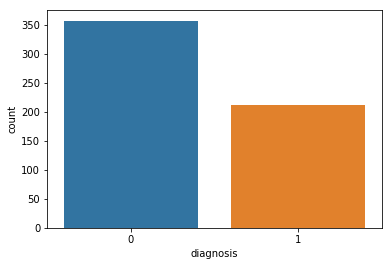

In [10]:
# Plotting the label class

ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [11]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [12]:
# Visualizing the features with swarm plot with respect the label "diagnosis"

# but before we proceed with that we need to standardize our data with StandardScalar()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = x
data_n_2 = scaler.fit_transform(data)
data_n_2 = pd.DataFrame(data_n_2, columns=data.columns)
data_n_2.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

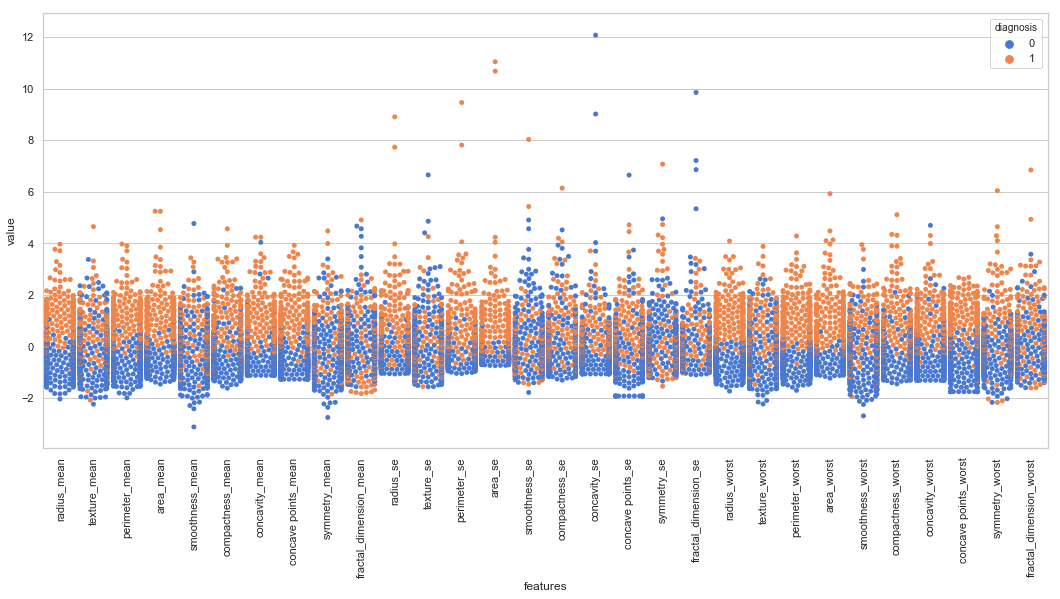

In [13]:
#Swarm plot for the set of features

sns.set(style="whitegrid", palette="muted")
data = pd.concat([y,data_n_2.iloc[:,0:30]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(18,8))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

In [14]:
#  From the above plot, the feature that looks more clear in terms of classification is "area_worst".
# looks like "malignant" and "benign" are seprated not totaly but mostly.

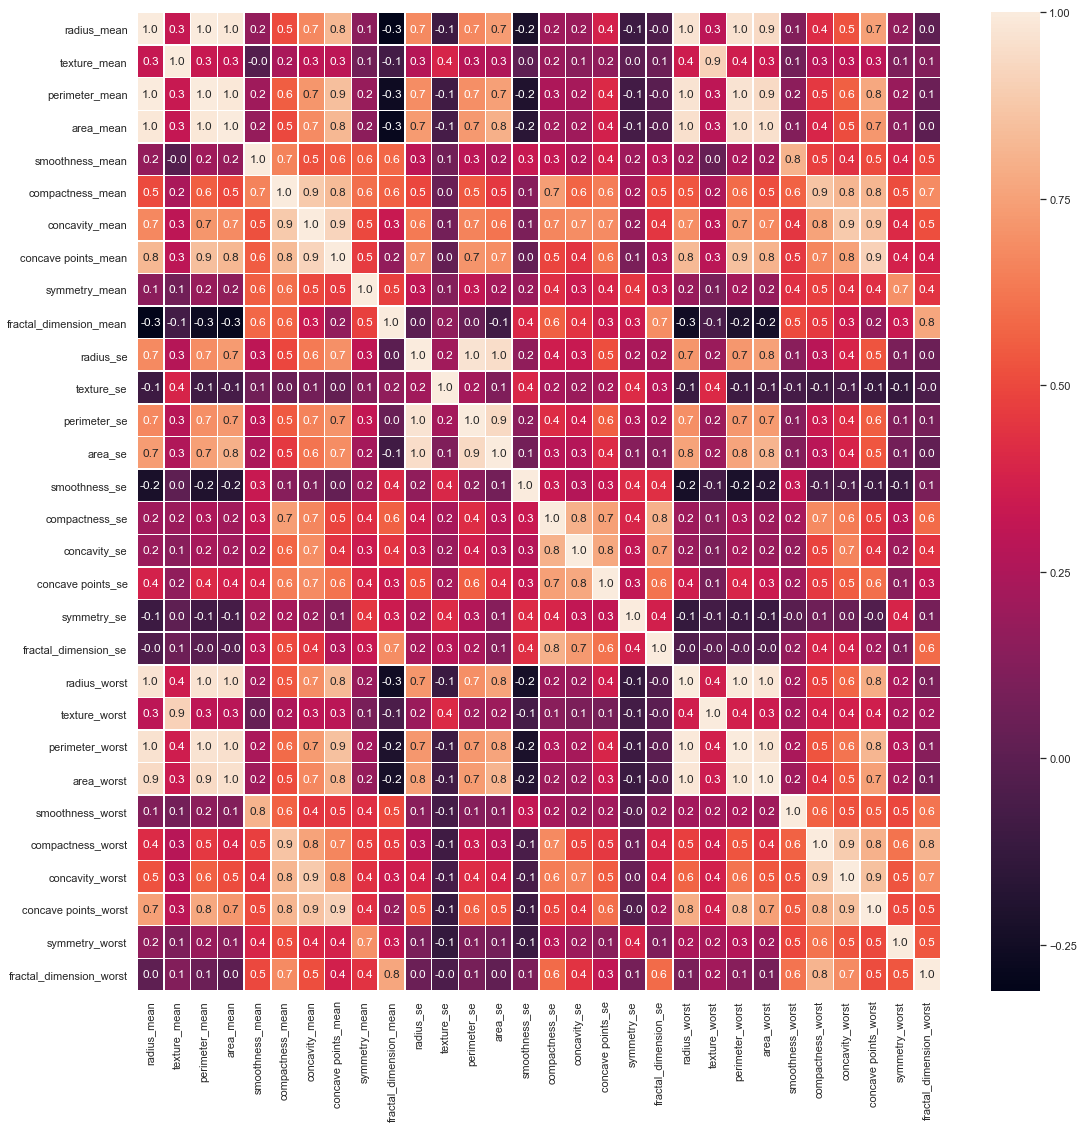

In [15]:
#Plotting correlation heat map

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [16]:
# We are finally at the feature selection, let us use this heat map and figure out the features which are highly correlated.

In [17]:
'''Feature Selection 

Here, we will select feature with different methods that are feature selection with: 
1. Correlation
2. Univariate feature selection 
3. Recursive feature elimination (RFE)
4. Recursive feature elimination with cross validation (RFECV)
5. Tree based feature selection
We will use random forest classification in order to train our model and predict.'''


'Feature Selection \n\nHere, we will select feature with different methods that are feature selection with: \n1. Correlation\n2. Univariate feature selection \n3. Recursive feature elimination (RFE)\n4. Recursive feature elimination with cross validation (RFECV)\n5. Tree based feature selection\nWe will use random forest classification in order to train our model and predict.'

In [18]:
# 1. Feature selection with correlation

# As it can be seen in map heat figure radius_mean, perimeter_mean and area_mean are correlated with each other so we will use only area_mean. 
#If you ask how i choose area_mean as a feature to use, well actually there is no correct answer, 
#It is decided based on swarm plots and area_mean looks most clear, although we cannot make exact separation among other correlated features. 
#So lets find other correlated features and look accuracy with random forest classifier.

#Compactness_mean, concavity_mean and concave points_mean are correlated with each other.
#Therefore we choose concavity_mean.

#Apart from these, radius_se, perimeter_se and area_se are correlated and we choose area_se.

#radius_worst, perimeter_worst and area_worst are correlated so we choose area_worst.

#Compactness_worst, concavity_worst and concave points_worst are correlated so we choose concavity_worst.

#Compactness_se, concavity_se and concave points_se are correlated so we choose concavity_se.

#texture_mean and texture_worst are correlated and we choose texture_mean.

#area_worst and area_mean are correlated, we choose area_mean.

In [19]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst',
              'perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # We do not modify x, we will use it later 
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


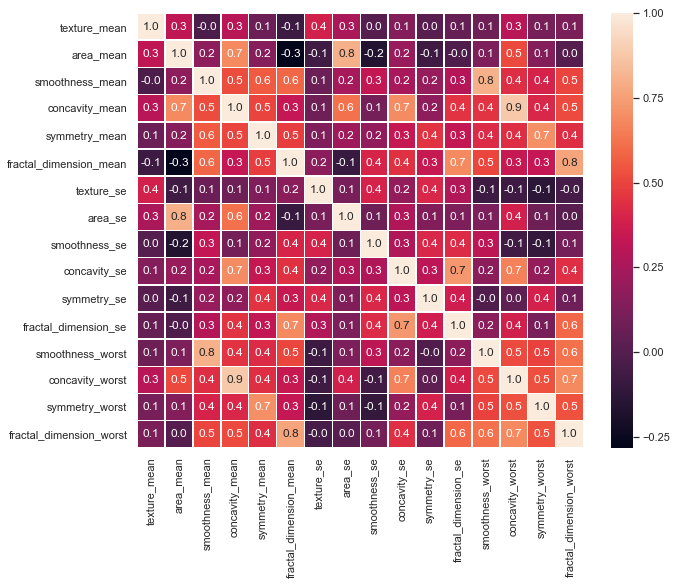

In [20]:
#Plotting correlation heat map with new set of features

f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [21]:
# Although concavity_mean and concavity_worst have have high correlation (0.9), but still we'll retain it and continue with the analysis.

Accuracy is:  0.9590643274853801


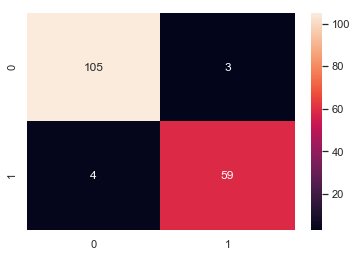

In [22]:
#Now, we'll use random forest and find accuracy with the chosen features.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=42)      
clf_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [23]:
#Accuracy is almost 95% and as it can be seen in confusion matrix, we make few wrong prediction. 
#Now lets see other feature selection methods to find better results.

In [24]:
# 2) Univariate feature selection

# In univariate feature selection, we will use SelectKBest 
# We choose k = 5 and find best 5 features.

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def select_kbest_classif(x, y, k):
    feat_selector = SelectKBest(chi2, k=k)
    _ = feat_selector.fit(x, y)
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["P Value"] = feat_selector.pvalues_
    feat_scores["Support"] = feat_selector.get_support()
    feat_scores["Attribute"] = x.columns
    
    return feat_scores 

In [25]:
# find best scored 5 features
kbest = select_kbest_classif(x_train, y_train, 5)
kbest_cols = kbest[kbest.Support==True].Attribute
#kbest_cols

In [26]:
kbest_cols

0        texture_mean
1           area_mean
3      concavity_mean
7             area_se
13    concavity_worst
Name: Attribute, dtype: object

In [27]:
x_train_2 = x_train[kbest_cols.values]
x_test_2 = x_test[kbest_cols.values]

x_train_2.head()

,texture_mean,area_mean,concavity_mean,area_se,concavity_worst
149,17.91,585.0,0.02881,21.47,0.1564
124,16.39,553.5,0.08092,14.66,0.3308
421,13.98,656.1,0.14500,49.45,0.3219
195,16.33,516.4,0.03873,15.75,0.1764
545,23.23,573.2,0.02974,31.24,0.1049


Accuracy is:  0.9532163742690059


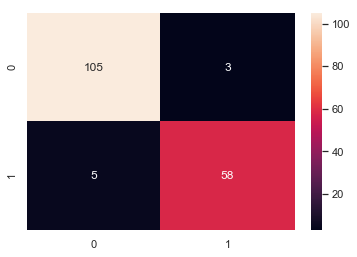

In [28]:
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier(random_state=42)      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

In [29]:
# Accuracy is almost 95% and as it can be seen in confusion matrix, we make few wrong prediction. 
# Although we chose 5 features in selectkBest method, accuracies are somewhat similar. 
# Now lets see other feature selection methods to find better results.

In [30]:
# 3) Recursive feature elimination (RFE) 

# RFE uses one of the classification methods (random forest in our example), assign weights to each of features. 
# the features whose absolute weights are the smallest are pruned from the current set features. 
# This procedure is recursively repeated on the pruned set until the desired number of features

#Here as well, we will use 5 features with RFE method.

from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier(random_state=42)      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['area_mean', 'concavity_mean', 'area_se', 'smoothness_worst',
       'concavity_worst'],
      dtype='object')


In [31]:
# Chosen 5 best features by rfe is exactly same as the previous (selectkBest) method.

In [32]:
# 4) Recursive feature elimination with cross validation

# Here, we will not only find best features but we also find how many features do we need for best accuracy.

from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier(random_state=42) 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 12
Best features : Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'fractal_dimension_mean', 'area_se', 'smoothness_se', 'concavity_se',
       'fractal_dimension_se', 'smoothness_worst', 'concavity_worst',
       'symmetry_worst'],
      dtype='object')


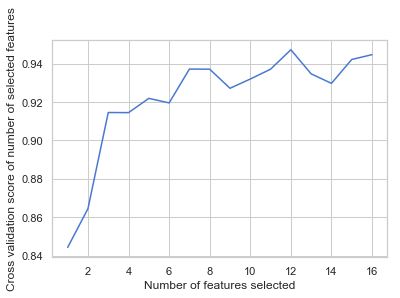

In [33]:
# Finally, we find best 12 features for best classification. Lets look at best accuracy with plot.

# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [34]:
# 5) Tree based feature selection through "featureimportances"

clf_rf_5 = RandomForestClassifier(random_state=42)      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 1 (0.276037)
2. feature 7 (0.150623)
3. feature 13 (0.147923)
4. feature 3 (0.138246)
5. feature 12 (0.071020)
6. feature 0 (0.055466)
7. feature 14 (0.039279)
8. feature 2 (0.030022)
9. feature 10 (0.015242)
10. feature 5 (0.014930)
11. feature 6 (0.012768)
12. feature 15 (0.011647)
13. feature 9 (0.011085)
14. feature 11 (0.010056)
15. feature 8 (0.009885)
16. feature 4 (0.005771)


(-1, 16)

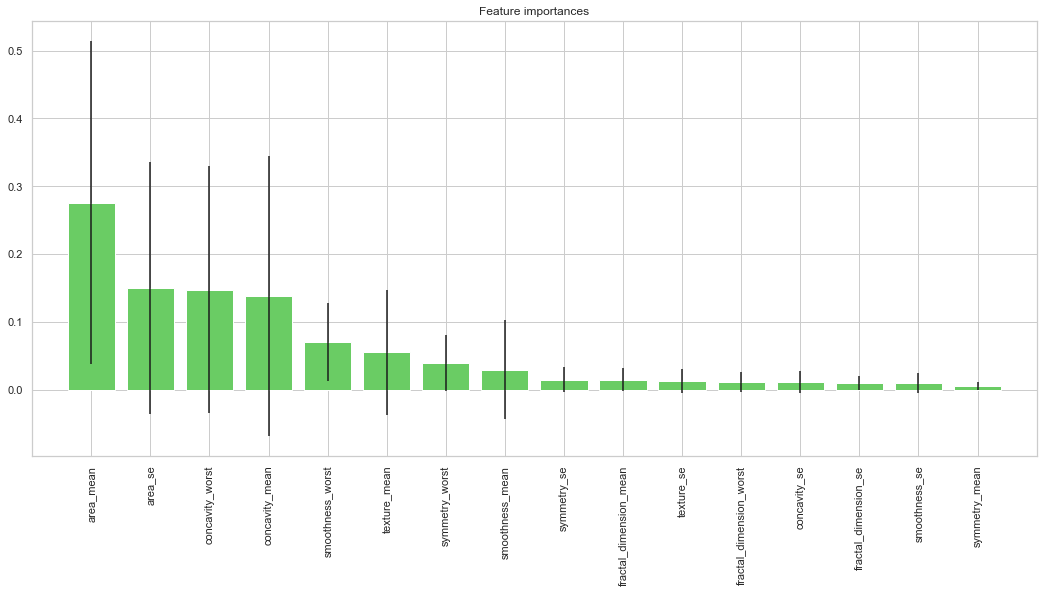

In [35]:
# Plot the feature importances of the forest

plt.figure(1, figsize=(18, 8))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])

In [36]:
# Defining and plotting Confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [37]:
# Defining other metrics 
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Accuracy  =     {:.3f}'.format((tp+tn)/(tp+tn+fp+fn)))
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

In [38]:
# defining and plotting Precision-recall curve
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show()

In [39]:
# Defining and plotting ROC curve
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
   # plt.xlim([0.0,0.001])
   # plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.title('ROC Curve')
    plt.show()

In [40]:
# Plotting Learning curve
def plot_learning_curve(estimator, title, x_train, y_train, ylim = None, cv = None,
                        n_jobs = 1, train_sizes = np.linspace(.1, 1.0, 5)):
    """
    Plots a learning curve. http://scikit-learn.org/stable/modules/learning_curve.html
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, x_train, y_train, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r",
             label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g",
             label = "Cross-validation score")
    plt.legend(loc = "best")
    return plt

In [41]:
# Defining Cross validation metrics 

def cross_val_metrics(model) :
    scores = ['accuracy', 'precision', 'recall']
    for sc in scores:
        scores = cross_val_score(model, x_train, y_train, cv = 5, scoring = sc)
        print('[%s] : %0.5f (+/- %0.5f)'%(sc, scores.mean(), scores.std()))

In [42]:
# Finally we go ahead with Recursive feature elimination with cross validation 

In [43]:
# Predictive model : Logistic Regression

# Find best hyperparameters (accuracy)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
random_state = 42

log_clf = LogisticRegression(random_state = random_state)
param_grid = {
            'penalty' : ['l2','l1'],  
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }

CV_log_clf = GridSearchCV(estimator = log_clf, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1)
CV_log_clf.fit(x_train, y_train)

best_parameters = CV_log_clf.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


The best parameters for using this model is {'C': 100, 'penalty': 'l1'}


[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    4.7s finished


In [44]:
#Log with best hyperparameters
CV_log_clf = LogisticRegression(C = best_parameters['C'], 
                                penalty = best_parameters['penalty'], 
                                random_state = random_state)

CV_log_clf.fit(x_train, y_train)
y_pred = CV_log_clf.predict(x_test)
y_score = CV_log_clf.predict_proba(x_test)[:,1]

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
cm

array([[105,   3],
       [  1,  62]], dtype=int64)

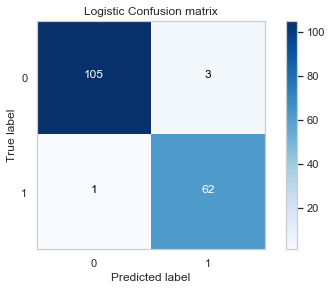

Accuracy  =     0.977
Precision =     0.954
Recall    =     0.984
F1_score  =     0.969


In [45]:
#Plotting Confusion Matrix
class_names = [0,1]

np.unique(y_train)
plt.figure()
plot_confusion_matrix(cm, classes=class_names, title='Logistic Confusion matrix')
#plt.savefig('6')
plt.grid(b=None)
plt.show()

show_metrics()

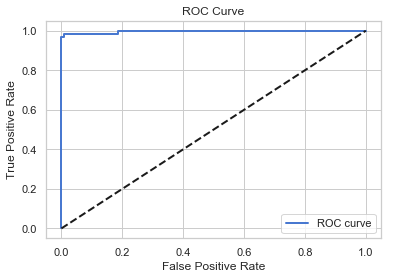

In [46]:
fpr, tpr, t = roc_curve(np.array(y_test.astype(int)), y_score)
plot_roc()

Recall w/ threshold = 0.1 : 0.9841269841269841
Recall w/ threshold = 0.2 : 0.9841269841269841
Recall w/ threshold = 0.3 : 0.9841269841269841
Recall w/ threshold = 0.4 : 0.9841269841269841
Recall w/ threshold = 0.5 : 0.9841269841269841
Recall w/ threshold = 0.6 : 0.9841269841269841
Recall w/ threshold = 0.7 : 0.9682539682539683
Recall w/ threshold = 0.8 : 0.9365079365079365
Recall w/ threshold = 0.9 : 0.9047619047619048


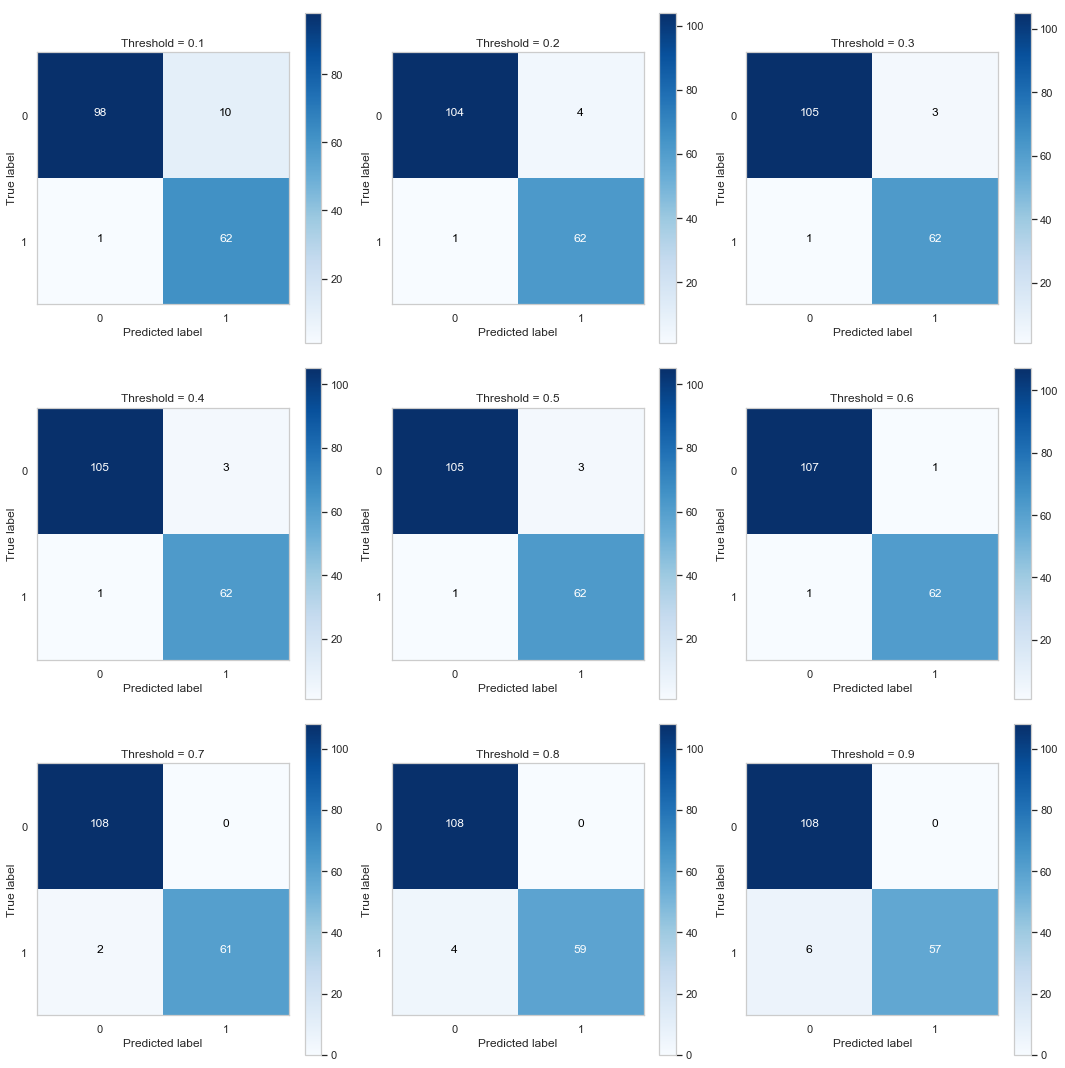

In [47]:
# Select threshold to maximize Recall (all malignant tumors detected)

# Threshold
thresholds_adj = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

plt.figure(figsize = (15,15))

j = 1
for i in thresholds_adj:
    y_score = CV_log_clf.predict_proba(x_test)[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    plt.grid(b=None)
    
    cm = confusion_matrix(y_test, y_score)
    
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]

    print('Recall w/ threshold = %s :'%i, (tp/(tp+fn)))
    
    class_names = [0,1]
    plot_confusion_matrix(cm, classes=class_names, title='Threshold = %s'%i) 

In [48]:
y_score = CV_log_clf.predict_proba(x_test)[:,1] > 0.1
cm = confusion_matrix(y_test, y_score)
class_names = [0,1]
show_metrics()

Accuracy  =     0.936
Precision =     0.861
Recall    =     0.984
F1_score  =     0.919


In [49]:
# Predictive model 2 : Ensemble Classifier to maximise precision and detect all malignant tumors

# Find the best parameters (recall)
log2_clf = LogisticRegression(random_state = random_state)
param_grid = {
            'penalty' : ['l2','l1'],  
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            }

CV_log2_clf = GridSearchCV(estimator = log2_clf, param_grid = param_grid , scoring = 'recall', verbose = 1, n_jobs = -1)
CV_log2_clf.fit(x_train, y_train)

best_parameters = CV_log2_clf.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


The best parameters for using this model is {'C': 0.001, 'penalty': 'l1'}


[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    0.3s finished


In [50]:
# Log w best hyperparameters (recall)
CV_log2_clf = LogisticRegression(C = best_parameters['C'], 
                                 penalty = best_parameters['penalty'], 
                                 random_state = random_state)


CV_log2_clf.fit(x_train, y_train)

y_pred = CV_log2_clf.predict(x_test)
y_score = CV_log2_clf.decision_function(x_test)
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]

In [51]:
# Cross val log2
cross_val_metrics(CV_log2_clf)

[accuracy] : 0.38205 (+/- 0.01410)
[precision] : 0.37733 (+/- 0.00467)
[recall] : 1.00000 (+/- 0.00000)


In [52]:
#  Voting classifier : log + log2

#Voting Classifier
voting_clf = VotingClassifier (
        estimators = [('log1', CV_log_clf), ('log_2', CV_log2_clf)],
                     voting='soft', weights = [1, 1])
    
voting_clf.fit(x_train,y_train)

y_pred = voting_clf.predict(x_test)
y_score = voting_clf.predict_proba(x_test)[:,1]

# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
show_metrics()

Accuracy  =     0.977
Precision =     0.954
Recall    =     0.984
F1_score  =     0.969


In [53]:
# Cross val score voting
cross_voting = cross_val_metrics(voting_clf)

[accuracy] : 0.95974 (+/- 0.01476)
[precision] : 0.95990 (+/- 0.02442)
[recall] : 0.93264 (+/- 0.04765)


Recall w/ threshold = 0.1 : 1.0
Recall w/ threshold = 0.2 : 1.0
Recall w/ threshold = 0.3 : 0.9841269841269841
Recall w/ threshold = 0.4 : 0.9841269841269841
Recall w/ threshold = 0.5 : 0.9841269841269841
Recall w/ threshold = 0.6 : 0.9523809523809523
Recall w/ threshold = 0.7 : 0.9206349206349206
Recall w/ threshold = 0.8 : 0.2857142857142857
Recall w/ threshold = 0.9 : 0.015873015873015872


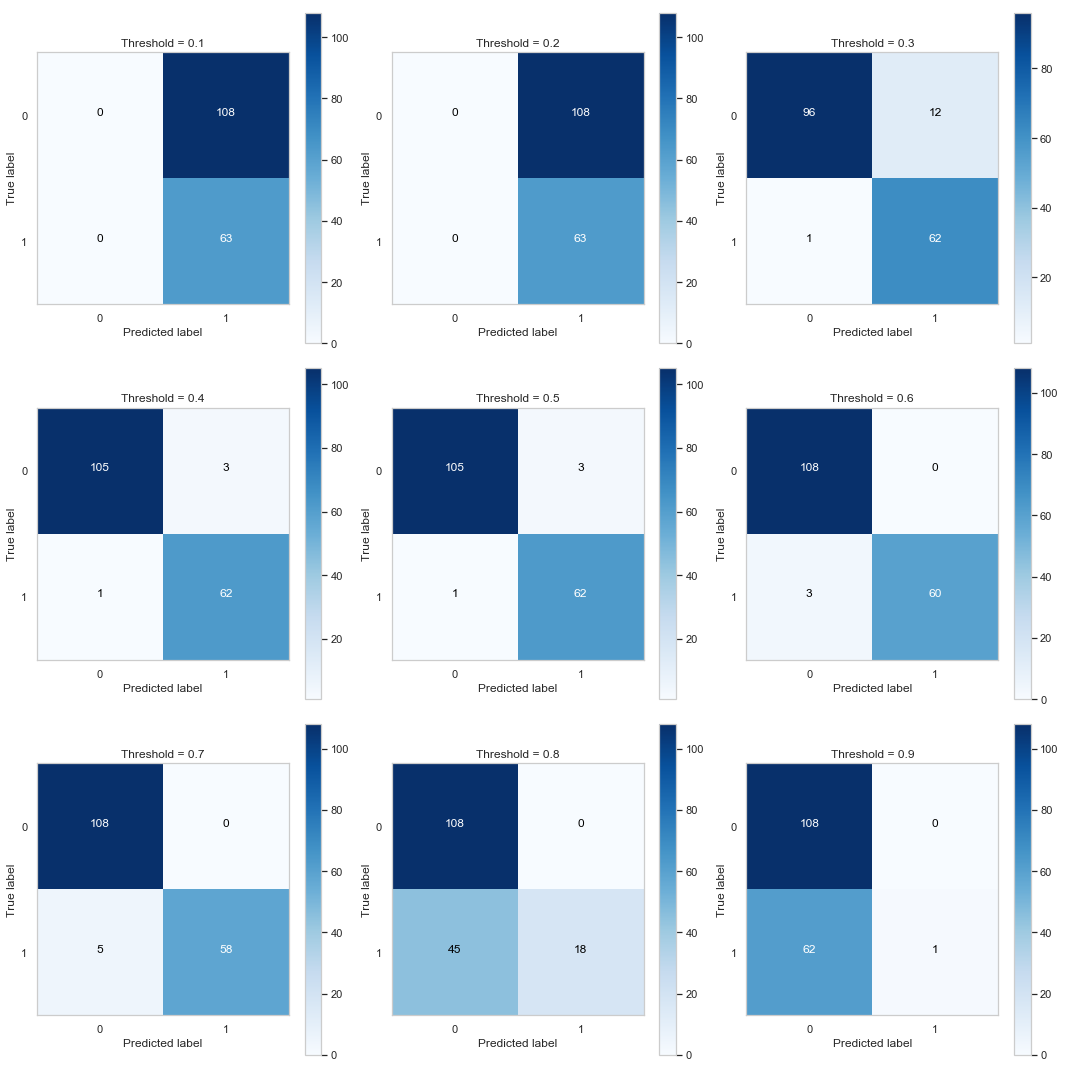

In [54]:
# Voting classifier : select threshold (recall = 100%)
# Threshold
thresholds_adj = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize = (15,15))

j = 1
for i in thresholds_adj:
    y_score = voting_clf.predict_proba(x_test)[:,1] > i
    
    
    plt.subplot(3,3,j)
    j += 1
    plt.grid(b=None)
    
    cm = confusion_matrix(y_test, y_score)
    
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]

    print('Recall w/ threshold = %s :'%i, (tp/(tp+fn)))
    
    class_names = [0,1]
    plot_confusion_matrix(cm, 
                          classes=class_names, 
                          title='Threshold = %s'%i) 

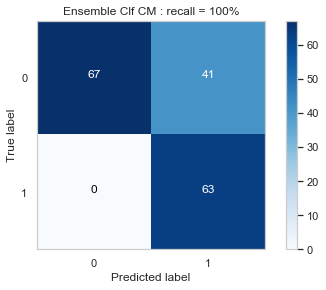

Accuracy  =     0.760
Precision =     0.606
Recall    =     1.000
F1_score  =     0.754


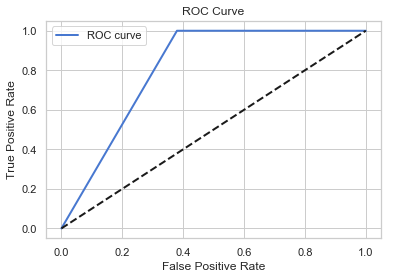

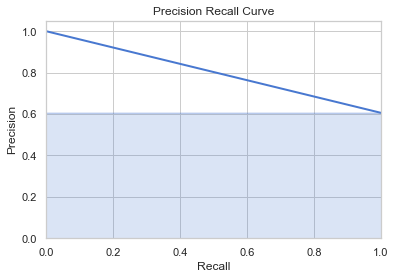

In [55]:
# Voting classifier : predicting with recall = 100% 

# Ensemble, recall = 1.
y_score = voting_clf.predict_proba(x_test)[:,1] > 0.264
cm = confusion_matrix(y_test, y_score)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'Ensemble Clf CM : recall = 100%')
plt.grid(b=None)
plt.savefig('8')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()